In [1]:
!pip install sktime

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.7/21.7 MB 15.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 122.9/122.9 kB 11.5 MB/s eta 0:00:00


In [2]:
import pandas as pd
from sktime.utils.plotting import plot_series
from sktime.forecasting.model_selection import temporal_train_test_split
from sktime.forecasting.ets import AutoETS
import matplotlib.pyplot as plt
from sktime.forecasting.base import ForecastingHorizon
from sktime.performance_metrics.forecasting import mean_squared_error
from sktime.forecasting.exp_smoothing import ExponentialSmoothing

In [35]:
df = pd.read_csv("/content/drive/MyDrive/Datasets/BUNDESBANK-BBK01_WT5511.csv", index_col=0)
idx = pd.to_datetime( df.index , dayfirst=True).to_period("M")
df.index = idx
idx

PeriodIndex(['1968-04', '1968-05', '1968-06', '1968-07', '1968-08', '1968-09',
             '1968-10', '1968-11', '1968-12', '1969-01',
             ...
             '2015-07', '2015-08', '2015-09', '2015-10', '2015-11', '2015-12',
             '2016-01', '2016-02', '2016-03', '2016-04'],
            dtype='period[M]', name='Date', length=577)

Plot:

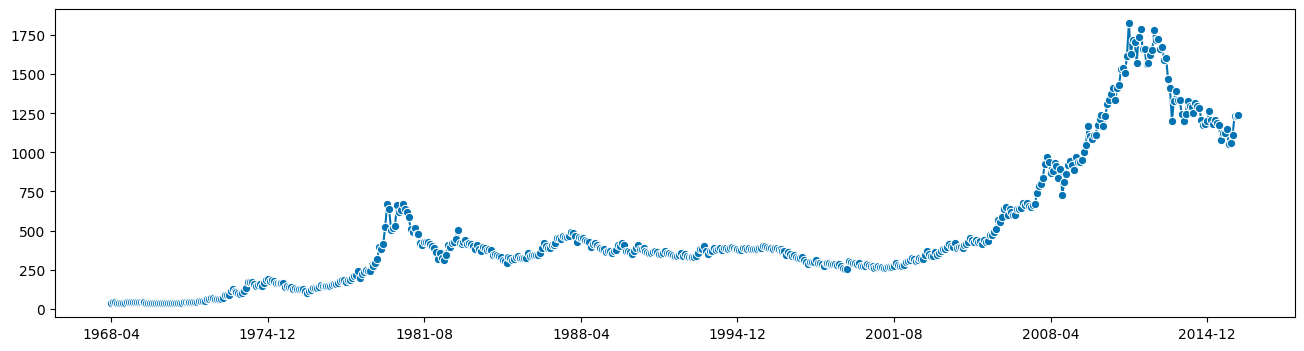

In [36]:
plot_series(df)
plt.show()

In [37]:
y = df['Value']
y_train, y_test = temporal_train_test_split(y,test_size=12)

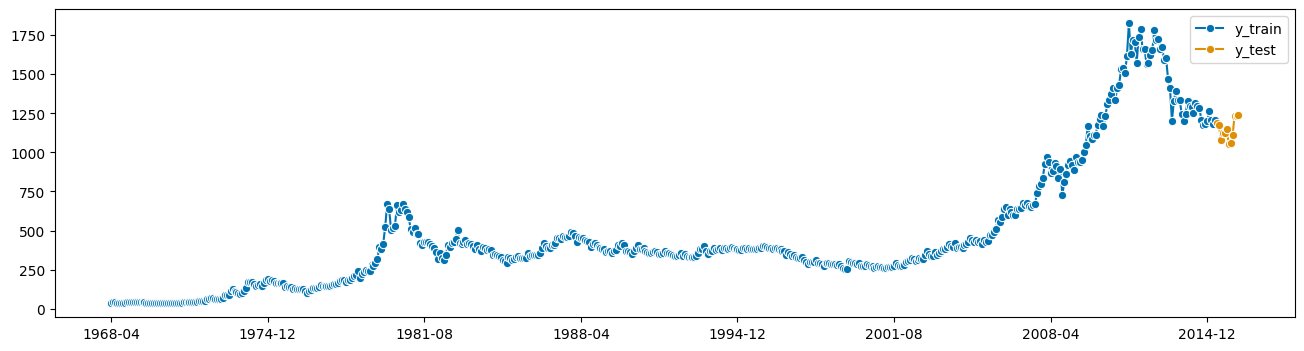

In [38]:
plot_series(y_train, y_test, labels=["y_train", "y_test"])
plt.show()

Speciying the Forecasting Horizon:

In [39]:
fh = ForecastingHorizon(y_test.index,is_relative=False)
fh

ForecastingHorizon(['2015-05', '2015-06', '2015-07', '2015-08', '2015-09', '2015-10',
             '2015-11', '2015-12', '2016-01', '2016-02', '2016-03', '2016-04'],
            dtype='period[M]', is_relative=False)

Exponential Smoothing (HW)

In [40]:
forecaster = ExponentialSmoothing(trend="add", seasonal="additive", sp=12)
forecaster.fit(y_train)
y_pred = forecaster.predict(fh)

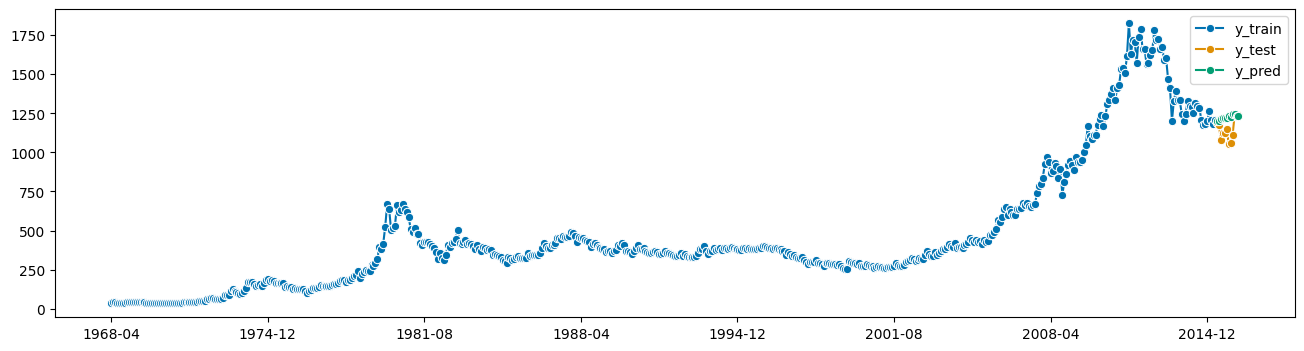

In [41]:
plot_series(y_train, y_test, y_pred, labels=["y_train", "y_test", "y_pred"])
plt.show()

In [42]:
print(mean_squared_error(y_test, y_pred,square_root=True))

99.09521108005092


State Space Models Approach:

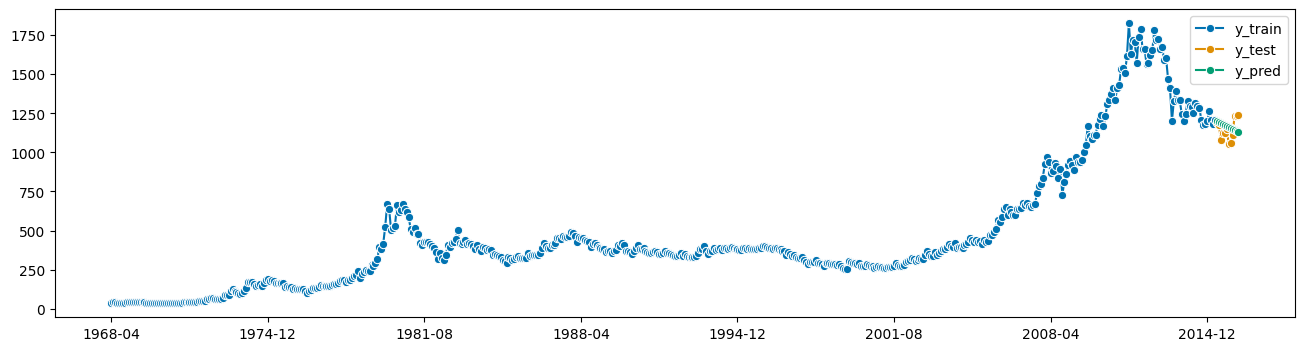

In [43]:
forecaster = AutoETS(auto=True, sp=12)
forecaster.fit(y_train)
y_pred = forecaster.predict(fh)
plot_series(y_train, y_test, y_pred, labels=["y_train", "y_test", "y_pred"])
plt.show()

In [44]:
print(forecaster.summary())

                                 ETS Results                                  
Dep. Variable:                      y   No. Observations:                  565
Model:                       ETS(MAN)   Log Likelihood               -2462.997
Date:                Sat, 13 Jan 2024   AIC                           4935.993
Time:                        06:34:38   BIC                           4957.677
Sample:                    04-30-1968   HQIC                          4944.457
                         - 04-30-2015   Scale                            0.003
Covariance Type:               approx                                         
                      coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------
smoothing_level     0.9999      0.045     22.333      0.000       0.912       1.088
smoothing_trend     0.0496      0.020      2.522      0.012       0.011       0.088
initial_level      38.8008      

In [ ]:
print(mean_squared_error(y_test, y_pred,square_root=True))

11.99798072249666
